In [ ]:
from stable_baselines import PPO2, DDPG, A2C
import seagul.envs
import gym
import pybullet_envs

#env_name = 'Walker2d-v2'
#env_name = "Walker2DBulletEnv-v0"
#env_name = 'su_acro_drake-v0'
#env_name = 'mj_su_cartpole-v0'
env_name = "CartPole-v0"
env = gym.make(env_name)


from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv

import numpy as np
import matplotlib.pyplot as plt

import os
import gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.ddpg.policies import LnMlpPolicy
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import DDPG
from stable_baselines.ddpg import AdaptiveParamNoiseSpec

best_mean_reward, n_steps = -np.inf, 0

def callback(_locals, _globals):
  """
  Callback called at each step (for DQN an others) or after n steps (see ACER or PPO2)
  :param _locals: (dict)
  :param _globals: (dict)
  """
  global n_steps, best_mean_reward
  # Print stats every 1000 calls
  if (n_steps + 1) % 1000 == 0:
      # Evaluate policy training performance
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-100:])
            print(x[-1], 'timesteps')
            print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))

            # New best model, you could save the agent here
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                # Example for saving best model
                print("Saving new best model")
                _locals['self'].save(log_dir + 'best_model.pkl')
        n_steps += 1
        return True


env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run

models = []
model = PPO2('MlpPolicy', env, 
             #nb_rollout_steps=500,
             #normalize_observations=True,
             #batch_size = 512,
             verbose=False,
            )
model.learn(int(2e6))


73
123.11602830022457
39.11749389741217


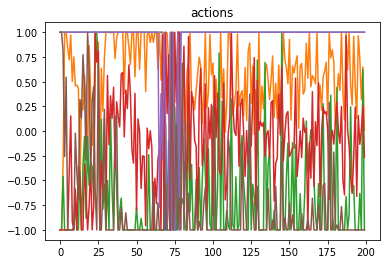

In [22]:
myenv = env
myenv.num_steps=200

#model.gate_fn.net_fn = gate
action_hist = np.zeros((myenv.num_steps,6))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))

obs = env.reset()

num_trials = 10
rewards = np.zeros((num_trials))

for trial in range(num_trials):
    obs = env.reset()
    for i in range(myenv.num_steps):
            actions, _states, = model.predict(obs)
            #actions = np.ones(1)*100
            obs, reward, done, _ = env.step(actions)        
            action_hist[i,:] = np.copy(actions)
            state_hist[i,:] = np.copy(obs)
            reward_hist[i,:] = np.copy(reward)
            #env.render()
            if done:
                break

    rewards[trial] = sum(reward_hist)

            
        

plt.plot(action_hist)
plt.title('actions')

# plt.figure()
# plt.plot(reward_hist)
# plt.title('reward')

# plt.figure()
# plt.plot(state_hist[:,0])
# plt.title("theta")

# plt.figure()
# plt.plot(state_hist[:,1])
# plt.title("x")


# plt.figure()
# plt.plot(state_hist[:,2])
# plt.title("theta dot")


# plt.figure()
# plt.plot(state_hist[:,3])
# plt.title("xdot ")



print(i)
#print(sum(reward_hist))
print(rewards.mean())
print(rewards.std())



In [ ]:
from numpy import pi

def control(env, q):
    k1 = 140.560
    k2 = -3.162
    k3 = 41.772
    k4 = 0#-8.314
    u = -4*(k1 * (q[0] - pi) + k2 * q[1] + k3 * q[2] + k4 * q[3])
    return u

myenv = env
myenv.num_steps=400

#model.gate_fn.net_fn = gate
action_hist = np.zeros((myenv.num_steps,1))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))
path_hist = np.zeros((myenv.num_steps,1))

obs = env.reset()
#env.state[0] = np.pi
model.hyst_state = 0

for i in range(myenv.num_steps):
        if ((155 * pi/180 < obs[0][0] < 220 * pi/180)):
            actions = np.array(control(env, obs[0]))/50
            #actions = np.zeros(1)
            path_hist[i]  = 1
        
        else:
            actions, _,  = model.predict(obs)
            path_hist[i] = 0
            
        
        actions = np.clip(actions, -75, 75)
        #actions = np.zeros(1)
        obs, reward, done, _ = env.step(np.array(actions).reshape(-1,1))
        action_hist[i,:] = np.copy(actions)
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        #env.render()
        if done:
            break

plt.plot(action_hist)
plt.title('action')


plt.figure()
plt.plot(path_hist)

plt.figure()
plt.plot(state_hist[:,0])
plt.title("theta")

plt.figure()
plt.plot(state_hist[:,1])
plt.title("x")


plt.figure()
plt.plot(state_hist[:,2])
plt.title("theta dot")


plt.figure()
plt.plot(state_hist[:,3])
plt.title("xdot ")

print(i)
print(sum(reward_hist))

In [2]:
rewards

array([[-1967.46878566,     0.        ,     0.        ,     0.        ],
       [-1975.04432526,     0.        ,     0.        ,     0.        ],
       [-1960.63329954,     0.        ,     0.        ,     0.        ],
       [-1959.69436482,     0.        ,     0.        ,     0.        ],
       [-1952.9140735 ,     0.        ,     0.        ,     0.        ],
       [-1971.14081908,     0.        ,     0.        ,     0.        ],
       [-1952.04835808,     0.        ,     0.        ,     0.        ],
       [-1893.88650594,     0.        ,     0.        ,     0.        ],
       [-1966.49728884,     0.        ,     0.        ,     0.        ],
       [-1949.22009965,     0.        ,     0.        ,     0.        ]])